<h1 id="weather_station_clustering" align="center"> Clustering Ghanaian households based on their expenditure patterns</h1>
<hr>

#### 1.4 Model Definition

In this notebook, we will present both deep learning and non-deep learning algorithms for clustering our dataset. We will start from a basic model and then compare the results to later complex models. We will also use both the original data set and a normalized dataset in the clustering analysis and compare the results. Lastly, we will use the SILHOUETTE COEFFICIENT as a performance indicator. 

DBSCAN will be used in this project to cluster households and find households which share same pattern of household expenditure. The DBSCAN clustering algorithm is chosen because it is robust to outliers compared to the other clustering algorithms. In the data exploration stage, we saw that our data contains a lot of outliers. 

About Dataset

<table width="100%" cellpadding="4" cellspacing="0">
    <colgroup>
        <col width="128*"/>
        <col width="128*"/>
    </colgroup>
    <tbody>
        <tr valign="top">
            <td width="50%">
                <p>
                    Column name
                </p>
            </td>
            <td width="50%">
                <p>
                    Meaning
                </p>
            </td>
        </tr>
        <tr valign="top">
            <td width="50%">
                <p>
                    TOTFOOD
                </p>
            </td>
            <td width="50%">
                <p>
                    Expenditure on food
                </p>
            </td>
        </tr>
        <tr valign="top">
            <td width="50%">
                <p>
                    TOTALCH
                </p>
            </td>
            <td width="50%">
                <p>
                    Expenditure on alcohol and narcotics
                </p>
            </td>
        </tr>
        <tr valign="top">
            <td width="50%">
                <p>
                    TOTCLTH
                </p>
            </td>
            <td width="50%">
                <p>
                    Expenditure on cloths, shoes
                </p>
            </td>
        </tr>
        <tr valign="top">
            <td width="50%">
                <p>
                    TOTHOUS
                </p>
            </td>
            <td width="50%">
                <p>
                    Expenditure on housing
                </p>
            </td>
        </tr>
        <tr valign="top">
            <td width="50%">
                <p>
                    TOTFURN
                </p>
            </td>
            <td width="50%">
                <p>
                    Expenditure on furniture
                </p>
            </td>
        </tr>
        <tr valign="top">
            <td width="50%">
                <p>
                    TOTHLTH
                </p>
            </td>
            <td width="50%">
                <p>
                    Expenditure on health
                </p>
            </td>
        </tr>
        <tr valign="top">
            <td width="50%">
                <p>
                    TOTRSP
                </p>
            </td>
            <td width="50%">
                <p>
                    Expenditure on transport
                </p>
            </td>
        </tr>
        <tr valign="top">
            <td width="50%">
                <p>
                    TOTCMNQ
                </p>
            </td>
            <td width="50%">
                <p>
                    Expenditure on communication
                </p>
            </td>
        </tr>
        <tr valign="top">
            <td width="50%">
                <p>
                    TOTRCRE
                </p>
            </td>
            <td width="50%">
                <p>
                    Expenditure on recreation
                </p>
            </td>
        </tr>
        <tr valign="top">
            <td width="50%">
                <p>
                    TOTEDUC
                </p>
            </td>
            <td width="50%">
                <p>
                    Expenditure on education
                </p>
            </td>
        </tr>
        <tr valign="top">
            <td width="50%">
                <p>
                    TOTMISC
                </p>
            </td>
            <td width="50%">
                <p>
                    Expenditure on miscellaneous
                </p>
            </td>
        </tr>
    </tbody>
</table>

#### FIRST PART  - NON DEEP LEARNING ALGORITHMS

Import Original data

In [10]:
import pandas as pd
df = pd.read_csv('final_capstone_project_data.csv')
df.drop(['Unnamed: 0','hid','region','rururb','TOTAL_EXP'], axis = 1, inplace = True)
df.head(2)

,TOTFOOD,TOTALCH,TOTCLTH,TOTHOUS,TOTFURN,TOTHLTH,TOTTRSP,TOTCMNQ,TOTRCRE,TOTEDUC,TOTMISC
0,9437.439453,0.0,1978.0,2569.800049,1128.790039,182.5,2248.399902,138.899994,55.25,1481.5,1081.459961
1,6990.479980,0.0,906.0,10808.799805,1693.709961,21.9,192.500000,370.399994,50.00,5079.0,260.200012


Normalized data

In [11]:
df_norm = pd.read_csv('df_norm_dataframe')
df_norm.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_norm.head(2)

,totfood,totalch,totclth,tothous,totfurn,tothlth,tottrsp,totcmnq,totrcre,toteduc,totmisc
0,0.869768,-0.282063,0.813326,0.597423,0.930850,0.270093,0.381865,-0.274590,-0.216681,-0.115215,0.970906
1,0.333146,-0.282063,-0.095515,3.937930,1.783318,-0.204459,-0.270768,0.137049,-0.224311,0.806321,-0.077166


### NON-DEEP learning algorithm - USING ORIGINAL DATA

Here, we use the original data for the clustering which will later to compared to results from the normalized data. NB: Data points with cluster label of -1 are noisy data. 

In [12]:
X = df.values # Define input variable

In [13]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics

# Compute DBSCAN - best model
db = DBSCAN(eps=0.08, min_samples=10, metric='cosine').fit(X) # we set minimum sample in each cluster to be 100
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [14]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [15]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 23


In [16]:
labels # there is one cluster

array([0, 0, 0, ..., 0, 0, 0])

And, we can add a new field to our dataframe to show the cluster label of each row:


In [17]:
df_dbscan = pd.DataFrame({'totfood':X[:,0],'totalch':X[:,1], 'totclth':X[:,2],'tothous':X[:,3],'totfurn':X[:,4], 'tothlth':X[:,5],
                       'tottrsp':X[:,6],'totcmnq':X[:,7], 'totrcre':X[:,8],'toteduc':X[:,9],'totmisc':X[:,10], 'label':labels})
df_dbscan.head(2)

,totfood,totalch,totclth,tothous,totfurn,tothlth,tottrsp,totcmnq,totrcre,toteduc,totmisc,label
0,9437.439453,0.0,1978.0,2569.800049,1128.790039,182.5,2248.399902,138.899994,55.25,1481.5,1081.459961,0
1,6990.479980,0.0,906.0,10808.799805,1693.709961,21.9,192.500000,370.399994,50.00,5079.0,260.200012,0


PCA Projection to 2D

Now, let's try to visualize the cluster, although we have only one cluster. First, lets use PCA to reduce the dimension of the data to two dimensions

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X)

principalDf_dbscan = pd.DataFrame(data = principalComponents
             , columns = ['C1', 'C2'])

In [19]:
principalDf_dbscan['label'] = df_dbscan.label

In [20]:
principalDf_dbscan.head(2)

,C1,C2,label
0,3663.216636,-2321.491001,0
1,4134.458827,1591.991001,0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'C2')

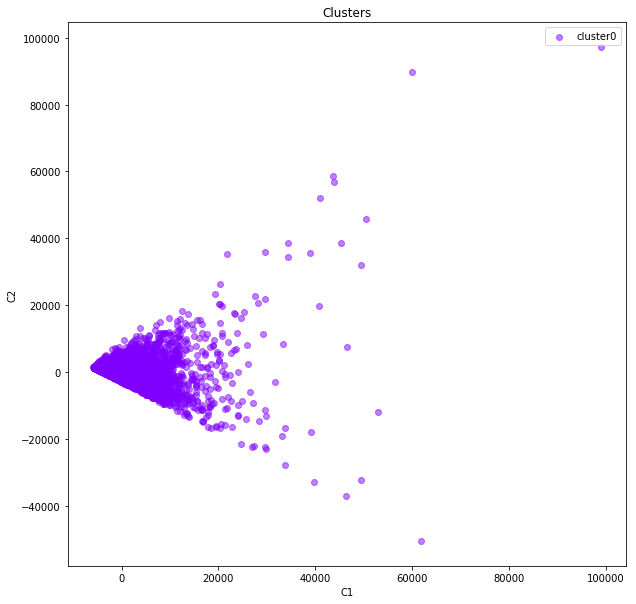

In [22]:
import matplotlib.cm as cm
from matplotlib import pyplot as plt 
n_clusters = n_clusters_
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(10,10))
pdf = principalDf_dbscan.copy()
# plt.scatter(subset.C1, subset.C2)
for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf.label == label] #subset is a dataframe including all the columns
    plt.scatter(subset.C1, subset.C2, c=color, label='cluster'+str(label),alpha=0.5) # plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('C1')
plt.ylabel('C2')

In [23]:
from sklearn.metrics import silhouette_samples, silhouette_score
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Silhouette Coefficient: -0.012


Not surprisingly, the silhouette coefficient is less than zero, indicating a very poor clustering

### NON-DEEP learning algorithm - USING NORMALIZED DATA¶

In [24]:
XX = df_norm.values # Define input variable

In [25]:
# Compute DBSCAN - best model
db = DBSCAN(eps=0.08, min_samples=10, metric='cosine').fit(XX) # we set minimum sample in each cluster to be 100
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [26]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [27]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 5
Estimated number of noise points: 2951


In [28]:
labels

array([-1, -1,  0, ...,  0,  0,  0])

And, we can add a new field to our dataframe to show the cluster label of each row:

In [29]:
df_dbscan_norm = pd.DataFrame({'totfood':X[:,0],'totalch':X[:,1], 'totclth':X[:,2],'tothous':X[:,3],'totfurn':X[:,4], 'tothlth':X[:,5],

                       'tottrsp':X[:,6],'totcmnq':X[:,7], 'totrcre':X[:,8],'toteduc':X[:,9],'totmisc':X[:,10], 'label':labels})

df_dbscan_norm.head(2)

,totfood,totalch,totclth,tothous,totfurn,tothlth,tottrsp,totcmnq,totrcre,toteduc,totmisc,label
0,9437.439453,0.0,1978.0,2569.800049,1128.790039,182.5,2248.399902,138.899994,55.25,1481.5,1081.459961,-1
1,6990.479980,0.0,906.0,10808.799805,1693.709961,21.9,192.500000,370.399994,50.00,5079.0,260.200012,-1


PCA Projection normalised data to 2D

Now, let's try to visualize the cluster, although we have only one cluster. First, lets use PCA to reduce the dimension of the data to two dimensions


In [30]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(XX)

principalDf_dbscan_norm = pd.DataFrame(data = principalComponents
             , columns = ['C1', 'C2'])

Add a label to the reduced data

In [31]:
principalDf_dbscan_norm['label'] = df_dbscan_norm.label

principalDf_dbscan_norm.head()

,C1,C2,label
0,1.406423,-0.243711,-1
1,1.802620,-1.670092,-1
2,-0.577850,-0.264246,0
3,0.999892,-0.393403,-1
4,2.798334,2.728244,0


Now we will drop noisy data. Rows with labels of -1

In [32]:
condition = principalDf_dbscan_norm.label != -1

In [33]:
principalDf_dbscan_norm = principalDf_dbscan_norm[condition]

Counting the number of clusters in each label

In [34]:
principalDf_dbscan_norm.label.value_counts()

0    5874
1      75
3      10
2       7
4       5
Name: label, dtype: int64

In [35]:
principalDf_dbscan_norm.head(2)

,C1,C2,label
2,-0.577850,-0.264246,0
4,2.798334,2.728244,0


Now, let's visualize the five clusters

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Text(0, 0.5, 'C2')

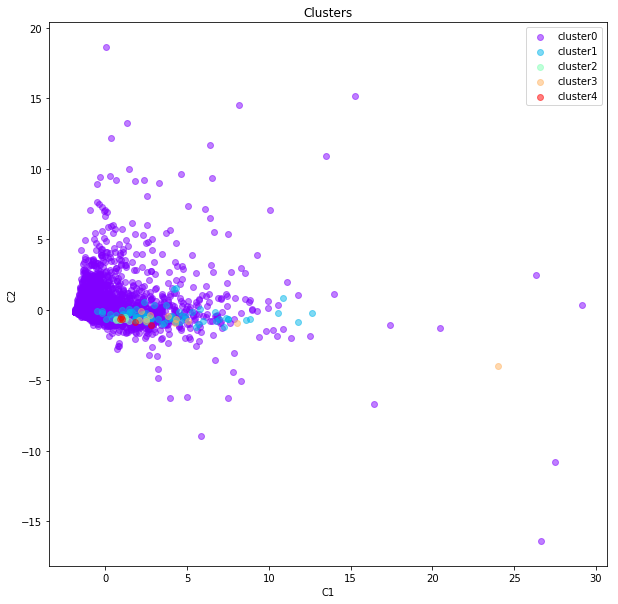

In [36]:
n_clusters = n_clusters_
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(10,10))
pdf = principalDf_dbscan_norm.copy()
# plt.scatter(subset.C1, subset.C2)
for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf.label == label] #subset is a dataframe including all the columns
    plt.scatter(subset.C1, subset.C2, c=color, label='cluster'+str(label),alpha=0.5) # plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('C1')
plt.ylabel('C2')

This clustering isn't great...Let's check the silhouette plot

In [37]:
from sklearn.metrics import silhouette_samples, silhouette_score
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(XX, labels))

Silhouette Coefficient: 0.026


This silhouettee coefficient is more than 0, indicating the clustering is better than the previous case.

### HDBSCAN

We will use HDBSCAN to perform the clustering and compare the results to the results above

In [1]:
import hdbscan

In [2]:
#!pip install --upgrade --user numpy

In [3]:
#!pip install hdbscan

In [39]:
xx = XX.copy()

In [40]:
# Compute HDBSCAN - best model
hdb = hdbscan.HDBSCAN().fit(xx) # we do not manually specify eps or min_sample or a metric

In [41]:
hdb.labels_

array([ 2, -1,  2, ...,  2,  2,  2])

In [42]:
n_clusters_ = hdb.labels_.max() + 1


In [43]:
print('number of clusters is ', n_clusters_)

number of clusters is  3


Add a label column to the data

In [44]:
df_hdbscan_norm = pd.DataFrame({'totfood':xx[:,0],'totalch':xx[:,1], 'totclth':xx[:,2],'tothous':xx[:,3],'totfurn':xx[:,4], 'tothlth':xx[:,5],

                       'tottrsp':xx[:,6],'totcmnq':xx[:,7], 'totrcre':xx[:,8],'toteduc':xx[:,9],'totmisc':xx[:,10], 'label':hdb.labels_})

df_hdbscan_norm.head(2)

,totfood,totalch,totclth,tothous,totfurn,tothlth,tottrsp,totcmnq,totrcre,toteduc,totmisc,label
0,0.869768,-0.282063,0.813326,0.597423,0.930850,0.270093,0.381865,-0.274590,-0.216681,-0.115215,0.970906,2
1,0.333146,-0.282063,-0.095515,3.937930,1.783318,-0.204459,-0.270768,0.137049,-0.224311,0.806321,-0.077166,-1


PCA Projection normalised data to 2D

Now, let's try to visualize the cluster, although we have only one cluster. First, lets use PCA to reduce the dimension of the data to two dimensions


In [45]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(xx)

principalDf_hdbscan_norm = pd.DataFrame(data = principalComponents
             , columns = ['C1', 'C2'])

Add a label to the reduced data

In [46]:
principalDf_hdbscan_norm['label'] = df_hdbscan_norm.label

principalDf_hdbscan_norm.head()

,C1,C2,label
0,1.406423,-0.243711,2
1,1.802620,-1.670092,-1
2,-0.577850,-0.264246,2
3,0.999892,-0.393403,2
4,2.798334,2.728244,-1


Now we will drop noisy data. Rows with labels of -1

In [47]:
condition = principalDf_hdbscan_norm.label != -1

principalDf_hdbscan_norm = principalDf_hdbscan_norm[condition]

Counting the number of clusters in each label

In [48]:
principalDf_hdbscan_norm.label.value_counts()

2    7480
1      23
0       6
Name: label, dtype: int64

Now, let's visualize the three clusters

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'C2')

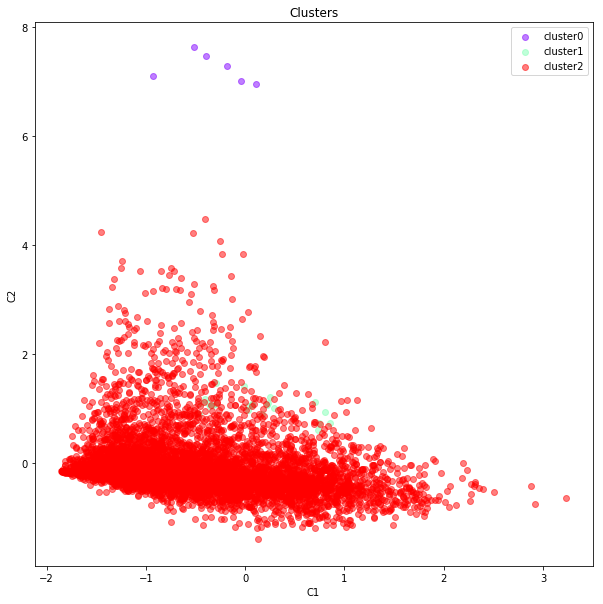

In [49]:
n_clusters = n_clusters_
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(10,10))
pdf = principalDf_hdbscan_norm.copy()
# plt.scatter(subset.C1, subset.C2)
for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf.label == label] #subset is a dataframe including all the columns
    plt.scatter(subset.C1, subset.C2, c=color, label='cluster'+str(label),alpha=0.5) # plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('C1')
plt.ylabel('C2')

This is a much better cluster

In [52]:
from sklearn.metrics import silhouette_samples, silhouette_score
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(xx, hdb.labels_))

Silhouette Coefficient: 0.469


We have a better Silhouette score closer to 0.5. Since HDBSCAN gives better results compared to DBSCAN, we choose HDBSCAN AS THE final model for this project 

#### PARALLEL PLOT for HDBSCAN

In [53]:
df_hdbscan_norm.head(2)

,totfood,totalch,totclth,tothous,totfurn,tothlth,tottrsp,totcmnq,totrcre,toteduc,totmisc,label
0,0.869768,-0.282063,0.813326,0.597423,0.930850,0.270093,0.381865,-0.274590,-0.216681,-0.115215,0.970906,2
1,0.333146,-0.282063,-0.095515,3.937930,1.783318,-0.204459,-0.270768,0.137049,-0.224311,0.806321,-0.077166,-1


Remove rows with labels of -1

In [113]:
condition = df_hdbscan_norm.label != -1

In [114]:
df_hdbscan_norm = df_hdbscan_norm[condition]

In [121]:
df_hdbscan_norm.head(4)

,totfood,totalch,totclth,tothous,totfurn,tothlth,tottrsp,totcmnq,totrcre,toteduc,totmisc,label
0,0.869768,-0.282063,0.813326,0.597423,0.930850,0.270093,0.381865,-0.274590,-0.216681,-0.115215,0.970906,2
2,-0.524523,-0.282063,-0.488894,0.058295,-0.199684,-0.182889,-0.331876,-0.261965,-0.265152,-0.282872,0.781011,2
3,0.234851,-0.282063,1.200771,0.042361,0.104170,-0.182889,0.486971,0.487875,-0.278814,-0.187837,0.737953,2
5,-0.627714,-0.282063,-0.404962,-0.381051,0.258828,-0.269171,-0.183566,0.088861,-0.256373,-0.181177,-0.224692,2


In [117]:
ddd = df_hdbscan_norm.label

In [123]:
df = pd.read_csv('final_capstone_project_data.csv') # original data
df.drop(['Unnamed: 0','hid','region','rururb','TOTAL_EXP'], axis = 1, inplace = True)
df.head(2)

,TOTFOOD,TOTALCH,TOTCLTH,TOTHOUS,TOTFURN,TOTHLTH,TOTTRSP,TOTCMNQ,TOTRCRE,TOTEDUC,TOTMISC
0,9437.439453,0.0,1978.0,2569.800049,1128.790039,182.5,2248.399902,138.899994,55.25,1481.5,1081.459961
1,6990.479980,0.0,906.0,10808.799805,1693.709961,21.9,192.500000,370.399994,50.00,5079.0,260.200012


In [124]:
b1 = pd.merge(ddd, df, how='inner', left_index = True, right_index=True) # we are merging on the household id.


In [126]:
b1.head(4)

,label,TOTFOOD,TOTALCH,TOTCLTH,TOTHOUS,TOTFURN,TOTHLTH,TOTTRSP,TOTCMNQ,TOTRCRE,TOTEDUC,TOTMISC
0,2,9437.439453,0.0,1978.0,2569.800049,1128.790039,182.500000,2248.399902,138.899994,55.250000,1481.5,1081.459961
2,2,3079.566895,0.0,442.0,1240.099976,379.599976,29.200001,0.000000,146.000000,21.900002,827.0,932.660034
3,2,6542.259766,0.0,2435.0,1200.800049,580.959961,29.200001,2579.500000,567.700012,12.500000,1198.0,898.919983
5,2,2609.020020,0.0,541.0,156.500000,683.450012,0.000000,467.199982,343.299988,27.940001,1224.0,144.599991


In [129]:
b1.groupby('label').mean()

,TOTFOOD,TOTALCH,TOTCLTH,TOTHOUS,TOTFURN,TOTHLTH,TOTTRSP,TOTCMNQ,TOTRCRE,TOTEDUC,TOTMISC
label,,,,,,,,,,,
0,3427.086405,2725.333333,731.250000,528.314280,374.326665,20.816666,782.630000,84.449999,83.724998,1153.750000,125.169998
1,3732.191067,10.791304,438.172138,416.858383,223.074782,18.726087,850.597828,70.169566,3225.342391,894.795652,86.203478
2,4518.285544,52.415799,777.028054,792.762761,376.389811,51.342539,510.773905,191.648568,86.658899,1340.493915,192.156838


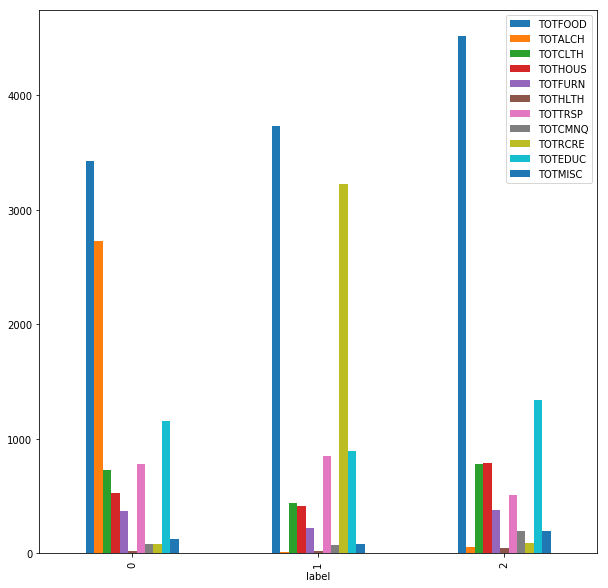

In [131]:
b1.groupby('label').mean().plot(kind='bar', figsize=(10,10))

No handles with labels found to put in legend.


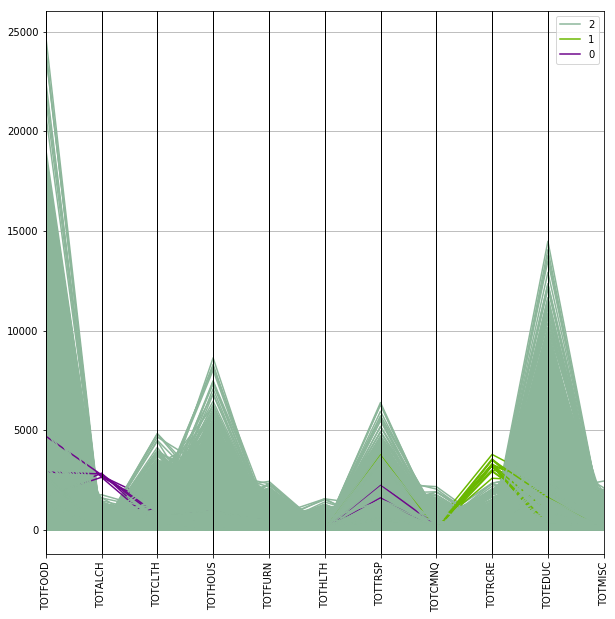

In [127]:
#parallelchord plot
import pandas
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(10,10))
plt.xticks(rotation='vertical')
plt.legend(loc='lower left')
parallel_coordinates(b1, 'label')
plt.show()

No handles with labels found to put in legend.


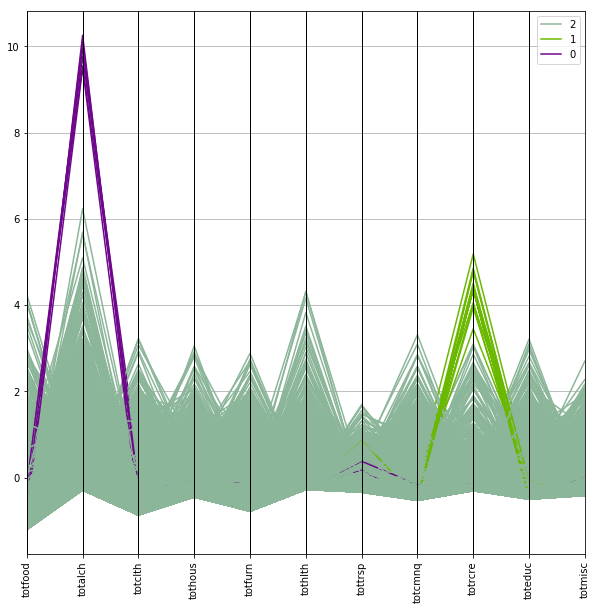

In [115]:
#parallelchord plot
import pandas
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(10,10))
plt.xticks(rotation='vertical')
plt.legend(loc='lower left')
parallel_coordinates(df_hdbscan_norm, 'label')
plt.show()

In [135]:
col_list= list(df)
b1['TOTAL_EXP'] = df[col_list].sum(axis=1)

In [137]:
b1.head()

,label,TOTFOOD,TOTALCH,TOTCLTH,TOTHOUS,TOTFURN,TOTHLTH,TOTTRSP,TOTCMNQ,TOTRCRE,TOTEDUC,TOTMISC,TOTAL_EXP
0,2,9437.439453,0.0,1978.0,2569.800049,1128.790039,182.500000,2248.399902,138.899994,55.250000,1481.5,1081.459961,40604.078796
2,2,3079.566895,0.0,442.0,1240.099976,379.599976,29.200001,0.000000,146.000000,21.900002,827.0,932.660034,14196.053764
3,2,6542.259766,0.0,2435.0,1200.800049,580.959961,29.200001,2579.500000,567.700012,12.500000,1198.0,898.919983,32089.679543
5,2,2609.020020,0.0,541.0,156.500000,683.450012,0.000000,467.199982,343.299988,27.940001,1224.0,144.599991,12394.019985
6,2,2154.959961,0.0,172.0,942.799988,142.600006,0.000000,0.000000,12.500000,47.520000,552.0,1145.000000,10338.759911


In [139]:
b2 = b1[['label','TOTAL_EXP']]

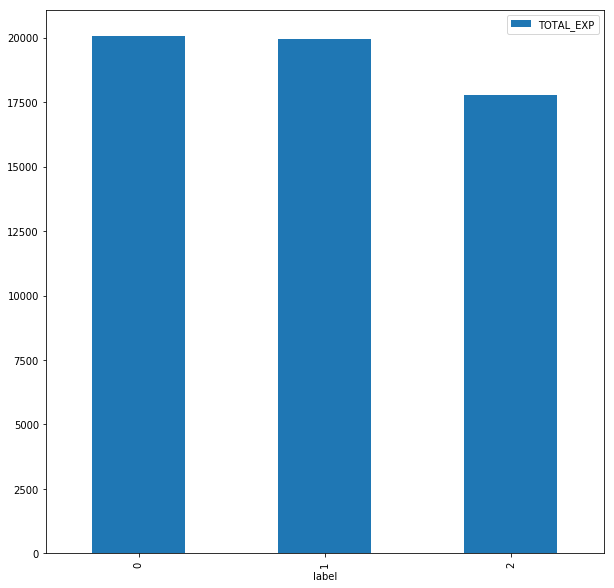

In [140]:
b2.groupby('label').mean().plot(kind='bar', figsize=(10,10))

Mean total expenditure is the same in each cluster, just the pattern is different

In [141]:
b1.to_csv('b1.csv')

#### SECOND PART  - DEEP LEARNING ALGORITHMS

CONCLUSION